# Keras를 사용한 개발 과정
1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 훈련 데이터를 정의
2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 네트워크(모델)을 정의
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    
3. 모델 컴파일
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
4. Training(훈련)
    - 모델의 fit() 메소드에 훈련데이터(X,y)를 넣어 Train.
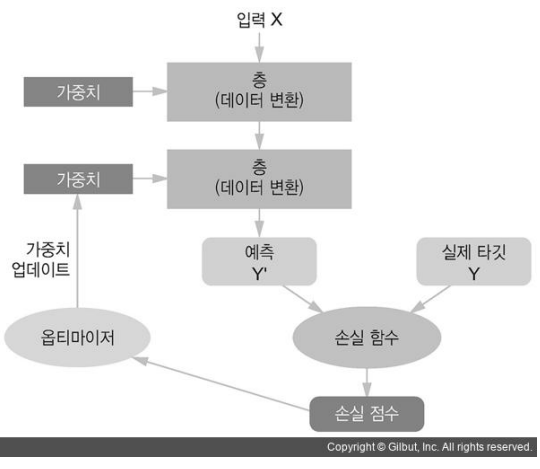

![딥러닝1.jpg](image/딥러닝1.jpg)

![딥러닝2](image/딥러닝2.jpg)

In [17]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.5.0'

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.5.0'

In [5]:
keras.__version__

'2.5.0'

In [6]:
# MNIST Dataset을 Loading - keras의 toy dataset으로 제공
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
type(train_image), type(train_label)

(numpy.ndarray, numpy.ndarray)

In [11]:
print(train_image.shape, train_label.shape)
# train_image: (이미지개수, height, width)
# train_label: (정답개수, )

(60000, 28, 28) (60000,)


In [9]:
print(test_image.shape, test_label.shape)

(10000, 28, 28) (10000,)


In [10]:
train_image.dtype

dtype('uint8')

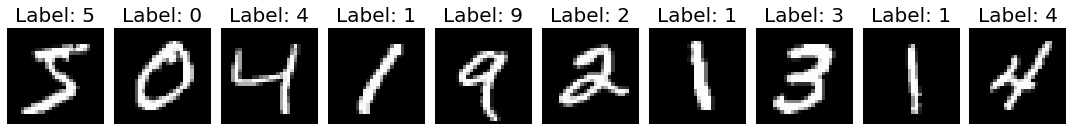

In [13]:
# train 10개 이미지를 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
for idx in range(10):
    plt.subplot(1,10,idx+1)
    plt.imshow(train_image[idx], cmap='gray')
    plt.title(f"Label: {train_label[idx]}", fontsize=20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

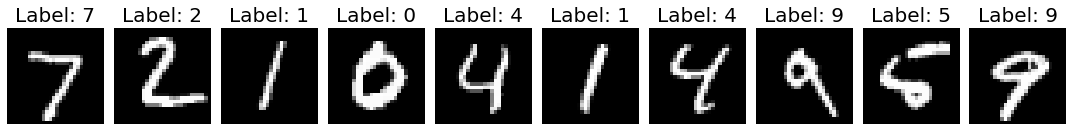

In [14]:
# test 10개 이미지를 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
for idx in range(10):
    plt.subplot(1,10,idx+1)
    plt.imshow(test_image[idx], cmap='gray')
    plt.title(f"Label: {test_label[idx]}", fontsize=20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## 신경망 구현

## network : 전체 모델 구조 만들기

In [18]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [43]:
# 모델(네트워크)
model = keras.Sequential()
# 모델에 Layer들을 추가 : 1~4번 입력레이어
# 그림 속 1번) 첫번째 Layer는 Input Layer (입력데이터의 shape)
model.add(keras.layers.InputLayer((28,28)))
# 그림 속 2번) 28 X 28 입력데이터를 1차원 배열(784,)로 변환 : 2~4 : 히든레이어
model.add(keras.layers.Flatten())
# 그림 속 3번)
# units 맘대로 가능
model.add(keras.layers.Dense(units=128, activation='relu'))
# 그림 속 4번)
# units 맘대로 가능
model.add(keras.layers.Dense(units=64, activation='relu'))
# 그림 속 5번) 출력레이어
# units=10 맘대로 못함. class 분류마지막에 10개라서 10이라고 둠...
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [20]:
'''
InputLater : 데이터 입구, 함수 입구, 데이터 사이즈를 입력 : 이 사이즈의 데이터만 읽는 모델이다!
            1개의 데이터가 어떤 shape를 가지고 있는지 알려줌.
            모양이 다른 애들은 사이즈를 맞춰줘야함.
Flatten : n차원 input을 1차원 input으로 바꿔줌.
Dense : 추론하는걸 도와줌, 1차원 배열만 처리 가능함.
'''

'\nInputLater : 데이터 입구, 데이터 사이즈를 입력 : 이 사이즈의 데이터만 읽는 모델이다!\n            1개의 데이터가 어떤 shape를 가지고 있는지 알려줌.\nDense : 추론하는걸 도와줌\n'

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## 컴파일 단계
- 구축된 모델에 학습을 위한 추가 설정
- 손실함수
- Optimizer(최적화 함수)
- 평가지표

In [44]:
# 모델이 학습할 수 있도록 만들어줌
model.compile(optimizer="adam", # 최적화함수-모델의 파라미터(weight)들을 업데이트
              loss="categorical_crossentropy", # 다중 분류일 때 Loss(손실,오차)를 계산하는 함수
              metrics=['accuracy']
             )

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다. 
- y (Output Data)
    - one hot encoding 처리
        - Label이 다중분류일 경우 One Hot Encoding 한다.
    - tensorflow.keras 의 to_categorical() 함수 이용

In [30]:
np.min(train_image), np.max(train_image), train_image.dtype

(0, 255, dtype('uint8'))

In [32]:
X_train = (train_image/255.0).astype(np.float32)
X_train.dtype

dtype('float32')

In [33]:
X_test = (test_image/255.0).astype(np.float32)

In [34]:
np.min(X_train), np.max(X_train), X_train.dtype

(0.0, 1.0, dtype('float32'))

In [35]:
train_label, np.unique(train_label)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [38]:
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
# Label onehot encoding
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [39]:
print(y_train.shape, train_label.shape)
y_train[:5]

(60000, 10) (60000,)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 학습 (fit)

In [46]:
# model.fit() : History 객체 반환
# History : train 시 에폭별 평가지표값들을 모아서 제공.

In [45]:
# 1 epoch(에폭): train dataset 전체를 한번 학습히는 것.
# 1 step : 파라미터(weight)를 한번 update
hist = model.fit(X_train, y_train, # train dataset - x,y
              epochs=10, # epich 수 - train dataest을 몇번 학습할지 지정.
              batch_size=100, # 파라미터(weight=모델의 학습대상)를 몇개의 데이터마다 업데이트할지 설정.-
              validation_split=0.3 # train set의 30%는 검증 데이터셋으로 사용.
             )

# 학습 데이터 : 60000개, batch_size: 100
# 1 epoch당 600 step

Epoch 1/10
420/420 [==============================] - 2s 4ms/step - loss: 0.3778 - accuracy: 0.8948 - val_loss: 0.1950 - val_accuracy: 0.9422
Epoch 2/10
420/420 [==============================] - 1s 3ms/step - loss: 0.1557 - accuracy: 0.9538 - val_loss: 0.1443 - val_accuracy: 0.9584
Epoch 3/10
420/420 [==============================] - 2s 4ms/step - loss: 0.1097 - accuracy: 0.9674 - val_loss: 0.1287 - val_accuracy: 0.9613
Epoch 4/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0817 - accuracy: 0.9758 - val_loss: 0.1547 - val_accuracy: 0.9524
Epoch 5/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0640 - accuracy: 0.9812 - val_loss: 0.1278 - val_accuracy: 0.9641
Epoch 6/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0501 - accuracy: 0.9853 - val_loss: 0.1051 - val_accuracy: 0.9693
Epoch 7/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0394 - accuracy: 0.9885 - val_loss: 0.1048 - val_accuracy: 0.9703
Epoch 

In [47]:
hist.history

{'loss': [0.37778472900390625,
  0.15567386150360107,
  0.10973656177520752,
  0.08171552419662476,
  0.0639997273683548,
  0.05006903409957886,
  0.039435356855392456,
  0.03217479959130287,
  0.025875328108668327,
  0.020121056586503983],
 'accuracy': [0.8947619199752808,
  0.9538333415985107,
  0.9674285650253296,
  0.9758333563804626,
  0.9811905026435852,
  0.9852856993675232,
  0.9885237812995911,
  0.9901666641235352,
  0.9923809766769409,
  0.9942380785942078],
 'val_loss': [0.1950056403875351,
  0.14428728818893433,
  0.12866678833961487,
  0.15474970638751984,
  0.1278492957353592,
  0.10512177646160126,
  0.10480370372533798,
  0.10360672324895859,
  0.10541092604398727,
  0.10084372013807297],
 'val_accuracy': [0.9421666860580444,
  0.9583888649940491,
  0.9612777829170227,
  0.9523888826370239,
  0.9640555381774902,
  0.9692777991294861,
  0.9703333377838135,
  0.9714999794960022,
  0.9709444642066956,
  0.9735000133514404]}

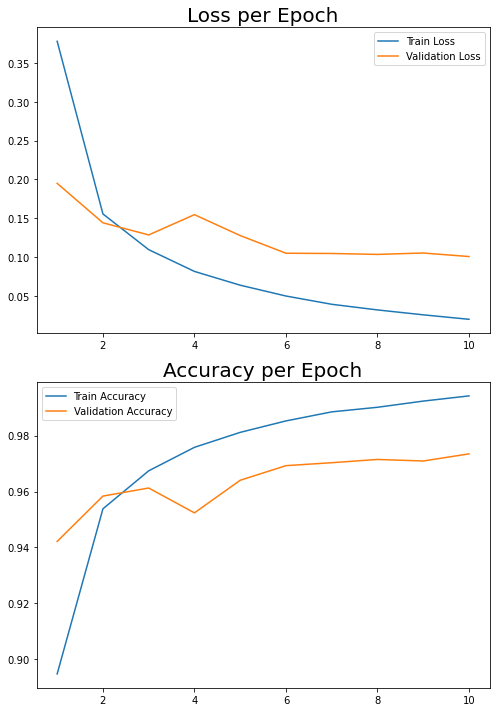

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
plt.plot(range(1,11), hist.history['loss'], label='Train Loss')
plt.plot(range(1,11), hist.history['val_loss'], label='Validation Loss')
plt.title("Loss per Epoch", fontsize=20)
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1,11), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1,11), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy per Epoch", fontsize=20)
plt.legend()

plt.legend()
plt.tight_layout()
plt.show()

## 테스트셋 평가

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test) # (X,y). 반환:Loss [, metrics 설정한 평가지표값]

313/313 [==============================] - 1s 3ms/step - loss: 0.0844 - accuracy: 0.9756


In [55]:
test_loss, test_acc

(0.08443757891654968, 0.975600004196167)

### 추론 메소드
- predict()
    - 각 클래스 별 확률 반환
- <del>predict_classes()</del>
    - 클래스(범주값) 반환
    - tensorflow 2.3 부터 deprecated 됨
- 이진 분류(binary classification)
    - `numpy.argmax(model.predict(x) > 0.5).astype("int32")`
- 다중클래스 분류(multi-class classification)
    - `numpy.argmax(model.predict(x), axis=-1)`
-     

In [57]:
# 새로운 이미지 -> 1. size를 28 X 28, 2. 0~1 scaling
new_image = X_test[:5]
new_image.shape

(5, 28, 28)

In [58]:
result = model.predict(new_image)

In [59]:
result.shape

(5, 10)

In [60]:
result[0]

array([1.2882880e-08, 4.2355236e-07, 8.6020027e-06, 7.6336373e-06,
       1.1620783e-09, 1.6400377e-09, 8.4206800e-12, 9.9998045e-01,
       6.0966563e-08, 2.8318202e-06], dtype=float32)

In [62]:
result_label = model.predict_classes

In [63]:
result_label2 = np.argmax(result, axis=-1)

In [64]:
result_label2

array([7, 2, 1, 0, 4], dtype=int64)